In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import squarify as sq
import plotly.io as pio
pio.templates
import seaborn as sns

In [3]:
df = pd.read_csv('dataset/funding.csv')
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-Jan-15,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-Jan-15,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-Jan-15,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-Jan-15,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [4]:
funding = df[['Date dd/mm/yyyy',	'Startup Name',	'Industry Vertical', 'SubVertical', 'Investors Name',	'InvestmentnType', 'Amount in USD',	'Remarks']].copy()

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Length: 3044, dtype: bool

In [6]:
df.drop_duplicates()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-Jan-15,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-Jan-15,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-Jan-15,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-Jan-15,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [7]:
funding['Date dd/mm/yyyy'] = pd.to_datetime(funding['Date dd/mm/yyyy'])
funding['Year'] = funding['Date dd/mm/yyyy'].dt.year
funding['Month'] = funding['Date dd/mm/yyyy'].dt.month
funding['Day'] = funding['Date dd/mm/yyyy'].dt.day
funding['Date dd/mm/yyyy'].replace(np.nan, '01/01/2020', inplace=True)

In [8]:
df['Date dd/mm/yyyy']

0       09-Jan-20
1       13-Jan-20
2       09-Jan-20
3       02-Jan-20
4       02-Jan-20
          ...    
3039    29-Jan-15
3040    29-Jan-15
3041    30-Jan-15
3042    30-Jan-15
3043    31-Jan-15
Name: Date dd/mm/yyyy, Length: 3044, dtype: object

In [9]:
df['Industry Vertical'].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [10]:
# Delete remarks column
df.drop('Remarks', axis=1, inplace=True)


In [11]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29-Jan-15,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29-Jan-15,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30-Jan-15,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30-Jan-15,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [12]:
# Startup Cleaning and Preprocessing repeated Company Names
df['Startup Name'].replace('Ola Cabs', 'Ola', inplace=True)
df['Startup Name'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['Startup Name'].replace('Oyo Rooms', 'Oyo', inplace=True)
df['Startup Name'].replace('.com', '', inplace=True)
df['Startup Name'].replace('Paytm Marketplace', 'Paytm', inplace=True)
df['Startup Name'].replace('.in', '', inplace=True)


In [13]:
import re
def clean_Amount_column(Amount):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    if isinstance(Amount, str):
            if Amount == 'undisclosed' or Amount == 'Undisclosed':
                return np.nan
            if Amount == 'unknown':
                return np.nan
            Amount = emoji_pattern.sub(r'', Amount)
            Amount = Amount.replace(',', '')
            Amount = Amount.replace('+', '')
            Amount = Amount.replace('\\\\xc2\\\\xa', '').replace('0N/A','')
            Amount = Amount.replace('.', '')
            if Amount:
                Amount = float(Amount)
                return float(Amount)       
            # print(Amount, type(Amount))
    return np.nan

In [14]:
df['Amount in USD'] = df['Amount in USD'].apply(clean_Amount_column)

In [15]:
def clean_Investors_Name_column(Investors_Name):
    if isinstance(Investors_Name, str):
        if Investors_Name == 'Undisclosed investors':
            return np.nan
        if Investors_Name == 'unknown investors':
            return np.nan
        Investors_Name == Investors_Name.replace('Undisclosed Investors', '')
        Investors_Name == Investors_Name.replace('\\\\n', '')
        Investors_Name == Investors_Name.replace('\\\\xc2\\\\xa0', '')
        Investors_Name == Investors_Name.replace('ecommerce', 'E-commerce')
        Investors_Name == Investors_Name.replace('Ecommerce', 'E-commerce')
        Investors_Name == Investors_Name.replace('Tele-Shopping / eCommerce', 'E-commerce')
        Investors_Name == Investors_Name.replace('Transportation & Logistics Platform', 'Transportation & Logistics')
        Investors_Name == Investors_Name.replace('Sales & Productivity Software', 'Sales & Productivity')
        Investors_Name == Investors_Name.replace('ECommerce Marketplace', 'E-commerce')
        if Investors_Name:
                Investors_Name = str(Investors_Name)
                return str(Investors_Name)
        
        return np.nan
df.drop_duplicates(subset=['Startup Name', 'Investors Name'], inplace=True)
df.drop_duplicates(subset=['Industry Vertical', 'Amount in USD'], inplace=True)
        
        
        
        
        

In [16]:
df['Industry Vertical'] = df['Industry Vertical'].apply(clean_Investors_Name_column)

In [17]:
# polar
df['Industry Vertical'].value_counts()

Consumer Internet                        205
Technology                               141
eCommerce                                 73
Finance                                   46
Healthcare                                31
                                        ... 
Developer Portfolio Showcase platform      1
Doctors Network Mobile App                 1
End-to-End Lending platform                1
on-demand healthcare marketplace           1
Online Travel Marketplace                  1
Name: Industry Vertical, Length: 816, dtype: int64

In [18]:
# nan values in Industry Vertical
df['Industry Vertical'].isna().sum()

68

In [19]:
# only take the top 50 industry vertical
top_industry_vertical = df['Industry Vertical'].value_counts().index[:15]
top_industry_vertical

Index(['Consumer Internet', 'Technology', 'eCommerce', 'Finance', 'Healthcare',
       'ECommerce', 'E-Commerce', 'Logistics', 'Education', 'Food & Beverage',
       'Ed-Tech', 'E-commerce', 'FinTech', 'IT', 'Food and Beverage'],
      dtype='object')

In [20]:
# records of top 50 industry vertical
df_top_industry_vertical = df[df['Industry Vertical'].isin(top_industry_vertical)].copy()
df_top_industry_vertical


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,6,13-Jan-20,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0
7,8,12-Dec-19,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0
8,9,06-Dec-19,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,70000000.0
...,...,...,...,...,...,...,...,...,...
2082,2083,22-Jan-16,Silvan,Technology,Home Automation & Security Solutions,Bangalore,The Chennai Angels,Seed Funding,515000.0
2100,2101,29-Jan-16,Aisle,Consumer Internet,Indians focused Matchmaking App,Bangalore,"TermSheet, ah! Ventures",Seed Funding,185000.0
2101,2102,29-Jan-16,FreshMenu,Consumer Internet,Fresh Food Delivery platform,Bangalore,"Zodius Technology Fund, Lightspeed Venture Par...",Private Equity,17000000.0
2102,2103,29-Jan-16,Truebil,ECommerce,Online marketplace for cars,Mumbai,"Kalaari Capital, Inventus Capital, Tekton Vent...",Private Equity,5150000.0


In [21]:
IV=df['Industry Vertical']
label15=np.arange(0,15)
top=df["Industry Vertical"].value_counts().head(15)
top

Consumer Internet    205
Technology           141
eCommerce             73
Finance               46
Healthcare            31
ECommerce             30
E-Commerce            25
Logistics             21
Education             18
Food & Beverage       12
Ed-Tech               12
E-commerce            10
FinTech                9
IT                     8
Food and Beverage      6
Name: Industry Vertical, dtype: int64

In [22]:
df['Amount in USD'].dtype

dtype('float64')

In [23]:
# bar chart dark theme
for template in ["plotly_dark", "plotly", "plotly_white", "ggplot2", "seaborn", "simple_white", "none"]:
    fig = px.bar(x=top.index, y=top, title="Top 15 Industry Vertical", log_y=True, labels={"x": "Industry Vertical", "y": "Count"}, color=top.index,
             width=1500, height=800, template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Dark24)

fig.add_trace(
    go.Scatter(
        x=top.index,
        y=top,
        mode="lines+markers",
        line=dict(color="red", width=5),
        name="lines+markers",
    )
)

In [24]:
# pie chart size of each sector
fig = px.pie(df_top_industry_vertical[:100], values='Amount in USD', names='Industry Vertical', title='Top 15 Industry Vertical',
            color='Industry Vertical',
            labels={'Industry Vertical':'Industry Vertical'},
            width=1500, height=800, template='plotly_dark',
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',)
fig.show()

In [25]:
# scatter plot

for template in ["plotly_dark", "plotly", "plotly_white", "ggplot2", "seaborn", "simple_white", "none"]:
    fig = px.scatter(df_top_industry_vertical[:1000], x="Amount in USD", y="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_x=True, size_max=60,
                title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
                width=1500, height=800, template= 'plotly_dark',
                color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [26]:
df_top_industry_vertical.sort_values(by='Amount in USD', ascending=False, inplace=True)
fig = px.histogram(df_top_industry_vertical,
                    x="Amount in USD", y="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_x=True,width=1500, height=800,
                title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
                )
fig.show()

In [27]:
# line chart
fig = px.line(df_top_industry_vertical[:80], x="Amount in USD", y="Industry Vertical", color="Industry Vertical", line_group= "Startup Name" ,hover_name="Startup Name",
             log_x=True, width=1500, height=800, title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
             color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [28]:
# box plot
fig = px.box(df_top_industry_vertical, y="Amount in USD", x="Industry Vertical", hover_name="Startup Name", log_y=True, points=False,
             width=1500, height=800, title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
             color_discrete_sequence=px.colors.qualitative.Dark24,)
fig.show()

In [29]:
# violin plot
fig = px.violin(df_top_industry_vertical, x="Amount in USD", y="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_x=True, box=True, points="all",)
fig.show()

In [30]:
# 3d scatter plot
fig = px.scatter_3d(df_top_industry_vertical, x="Amount in USD", y="Industry Vertical", z="Startup Name", color="Industry Vertical", hover_name="Startup Name", log_x=True, size_max=60,
                title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
                width=1500, height=800, color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [31]:
def _check_dataframe_all_leaves(df):
    df_sorted = df.sort_values(by=list(df.columns))
    null_mask = df_sorted.isnull()
    df_sorted = df_sorted.astype(str)
    df_sorted[null_mask] = np.nan
    return df_sorted

In [32]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [33]:
temp_df = df.dropna(subset=['Industry Vertical', 'City  Location'])
px.treemap(temp_df, path=['Industry Vertical', 'City  Location'], values='Amount in USD',
           width=1500, height=800, title="Top 15 Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"})


In [34]:
temp_df = df.dropna(subset=['Industry Vertical', 'Startup Name'])
fig = px.sunburst(temp_df[:15], path=['Industry Vertical', 'Startup Name'], values='Amount in USD', template='plotly_dark',
                  width=1500, height=800)
fig.show()

In [35]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [36]:
# line chart 
fig = px.line(df_top_industry_vertical[:200], x="Industry Vertical", y="Amount in USD",  color="Industry Vertical")
fig.show()

In [37]:
fig = px.ecdf(df_top_industry_vertical[:80], x="Industry Vertical", y="Amount in USD", color="Industry Vertical")
fig.show()

In [38]:
fig = px.histogram(df_top_industry_vertical[:60], x="Industry Vertical", y="Amount in USD", color="Industry Vertical")
fig.show()

In [39]:
fig = px.box(df_top_industry_vertical[:45], x="Industry Vertical", y="Amount in USD", color="Industry Vertical", 
            )
fig.show()

In [40]:
fig = px.funnel(df_top_industry_vertical[:30], x="Industry Vertical", y="Amount in USD", color="Industry Vertical",
                )
fig.show()

In [41]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [42]:
top_InvestmentnType = df['InvestmentnType'].value_counts().head(5)
top_InvestmentnType

Private Equity          753
Seed Funding            613
Seed/ Angel Funding      46
Series A                 24
Seed / Angel Funding     24
Name: InvestmentnType, dtype: int64

C:\Users\abhia\AppData\Local\Temp\ipykernel_20696\4282518122.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



[ 145000. 1334600.       0.  319605.       0.]


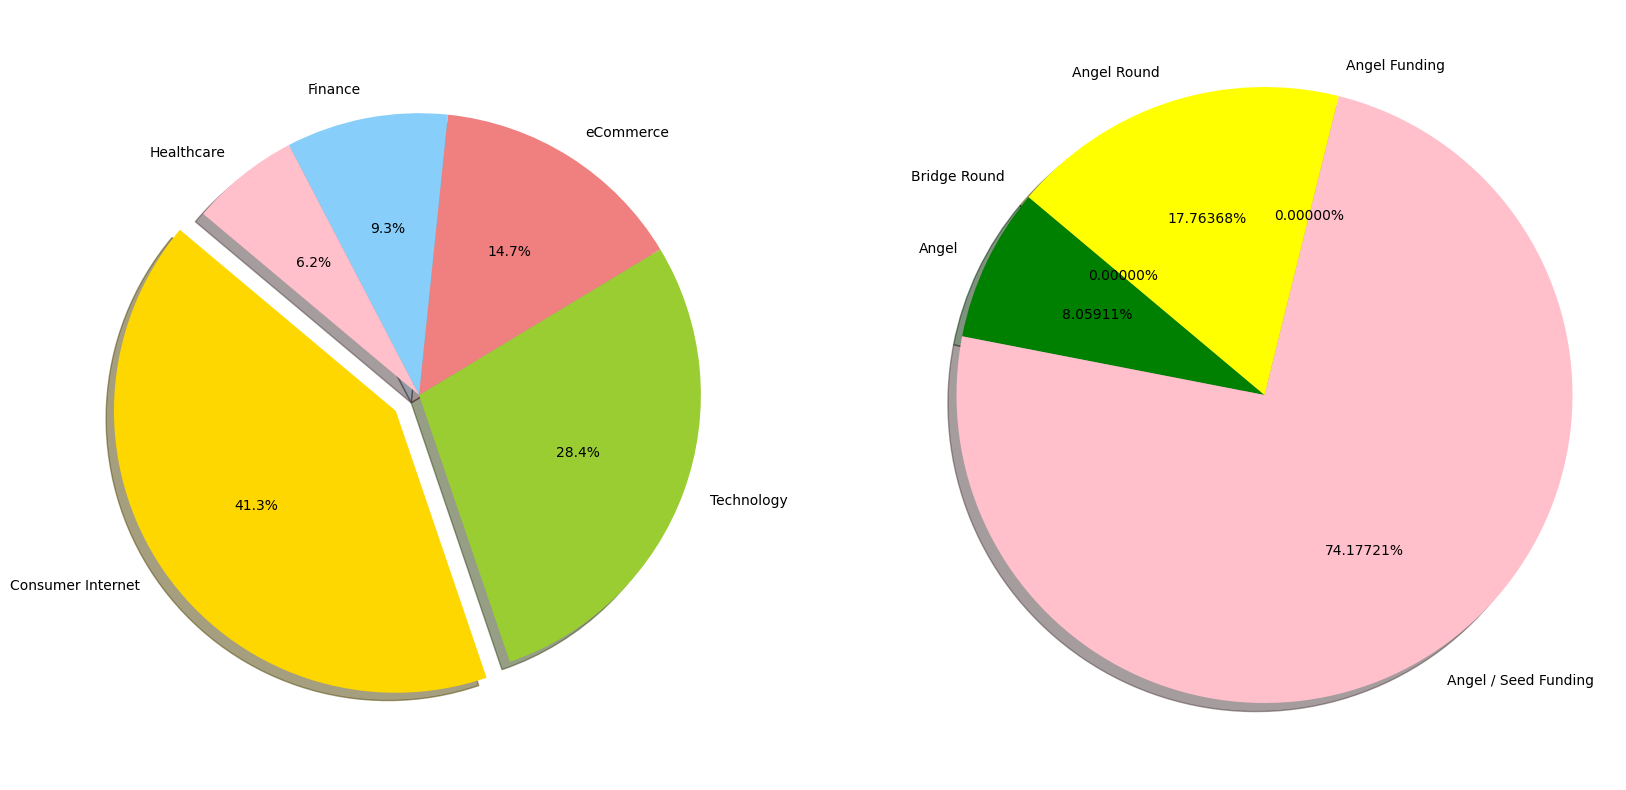

In [43]:
d=df['Industry Vertical'].value_counts().head(5)
g=df.groupby('InvestmentnType').sum()['Amount in USD']
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
labels=[d.index,g.index[:5]]
size=[d.values,g.values[:5]]
colors = [['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink'],['green','pink','red','yellow','blue']]
plt.axis('equal')
explode = ((0.1, 0, 0, 0,0),(-0.5,0.5,0.1,0.1))
print(size[1])
ax[0].pie(size[0],explode=explode[0], labels=labels[0], colors=colors[0],
        autopct='%1.1f%%', shadow=True, startangle=140)

ax[1].pie(size[1], labels=labels[1], colors=colors[1],autopct='%1.5f%%', shadow=True, startangle=140)
plt.show()

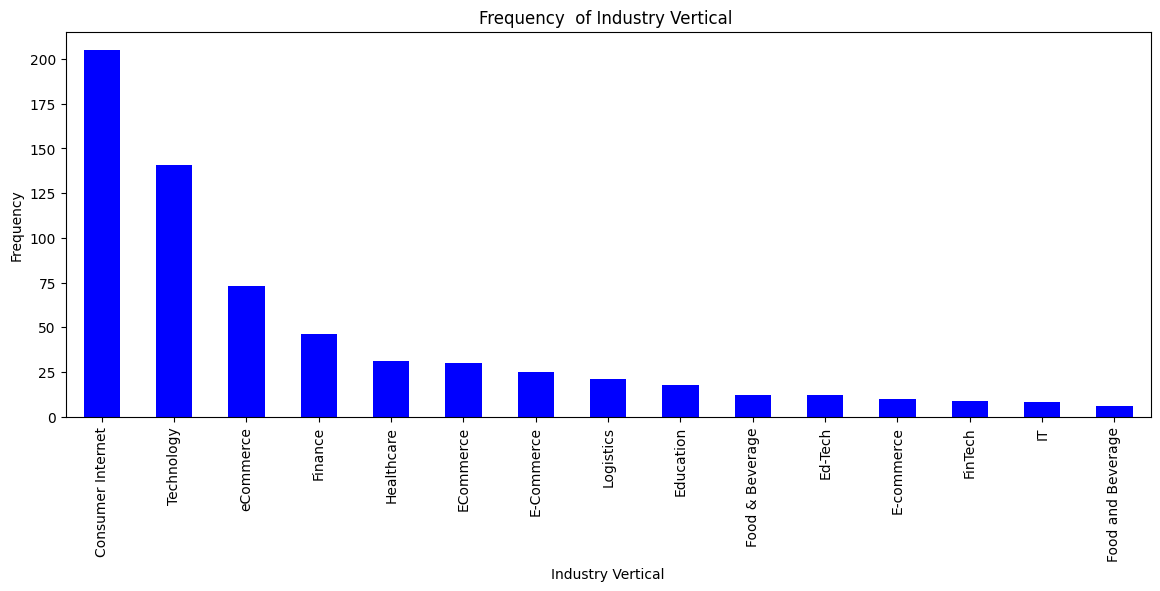

In [44]:
plt.figure(figsize=(15,15))
iv=df['Industry Vertical'].value_counts().head(15)
iv.plot.bar(df, color='blue',figsize=(14,5))

plt.title('Frequency  of Industry Vertical ')
plt.ylabel('Frequency')
plt.xlabel('Industry Vertical')
plt.show()

In [45]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [46]:
import resample as rs

Most preferrable cities as per Investment on startups

In [47]:
def clean_city_names(name):
    if name == '\\\\xc2\\\\xa0Noida':
        return 'Noida'
    elif name == '\\\\xc2\\\\xa0Bangalore':
        return 'Bangalore'
    elif name == '\\\\xc2\\\\xa0Gurgaon':
        return 'Gurugram'
    elif name == '\\\\xc2\\\\xa0New Delhi':
        return 'New Delhi'
    elif name == '\\\\xc2\\\\xa0Mumbai':
        return 'Mumbai'
    elif name == '\\\\xc2\\\\xa0Pune':
        return 'Pune'
    elif name == '\\\\xc2\\\\xa0Hyderabad':
        return 'Hyderabad'
    elif name == '\\\\xc2\\\\xa0Chennai':
        return 'Chennai'
    elif name == '\\\\xc2\\\\xa0Ahmedabad':
        return 'Ahmedabad'
    elif name == '\\\\xc2\\\\xa0Jaipur':
        return 'Jaipur'
    elif name == '\\\\xc2\\\\xa0Kolkata':
        return 'Kolkata'
    elif name == '\\\\xc2\\\\xa0Chandigarh':
        return 'Chandigarh'
    elif name == '\\\\xc2\\\\xa0Vadodara':
        return 'Vadodara'
    elif name == '\\\\xc2\\\\xa0Bhubaneshwar':
        return 'Bhubaneshwar'
    elif name == '\\\\xc2\\\\xa0Indore':
        return 'Indore'
    elif name == 'Mumbai/Bengaluru':
        return 'Mumbai'
    elif name == 'India/US':
        return 'India'
    elif name == 'India/Singapore':
        return ''
    elif name == 'Gurugram/San Francisco':
        return 'Gurugram'
    elif name == 'Bangalore':
        return 'Bengalore'
    
    # more
    return name

In [48]:
df['City  Location'].drop_duplicates().apply(clean_city_names).value_counts().head(10)

Mumbai                   3
New Delhi                2
Noida                    2
India                    2
Gurugram                 2
Bengaluru                1
Bangalore / SFO          1
Mumbai / NY              1
Bangalore / Palo Alto    1
Boston                   1
Name: City  Location, dtype: int64

In [49]:
df['City  Location'] = df['City  Location'].apply(clean_city_names)

In [50]:
top_city_location = df['City  Location'].value_counts().head(20)
top_city_location

Mumbai        329
Bengalore     326
New Delhi     212
Gurgaon       156
Bengaluru     113
Chennai        53
Hyderabad      51
Pune           50
Noida          41
Gurugram       38
Delhi          25
Ahmedabad      21
Jaipur         12
Kolkata         8
Chandigarh      6
Goa             6
Vadodara        5
Singapore       5
Indore          4
Coimbatore      4
Name: City  Location, dtype: int64

In [51]:
fig = px.bar(top_city_location, x=top_city_location.index,y=top_city_location , title='Top 15 City Location')
fig.show()

In [52]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [53]:
fig = px.area(df_top_industry_vertical[:200], x="Industry Vertical", y="Amount in USD",  color="Industry Vertical")
fig.show()